In [1]:
import Script.Image as Image
import Script.Validation as Validation
import Script.Processing as Processing
from scipy import ndimage
from sklearn.metrics import confusion_matrix
import seaborn as sn
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import joblib 

# Validation

In [15]:
validation = pd.read_csv('Data/Validation.csv', index_col = 0, header = 0) 
x_cols = ['B1','B2','B3','B4','B5','B6','B7','B8', 'B8A', 'B9','B10','B11','B12']

C:\Users\remot\.conda\envs\Blanca\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [27]:
validation = validation[validation['B1']!= 0]

In [31]:
validation.to_csv(r'Data/Validation.csv')

## 1. NDWI


accuracy: 0.9447221960192435
precision: 0.7785547785547785
recall: 0.23671155209071582
f1 score: 0.3630434782608696


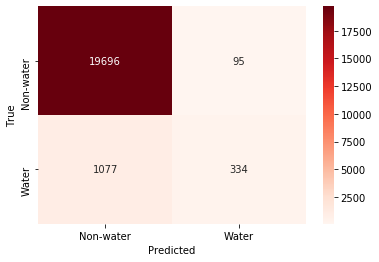

In [13]:
y_true, y_pred = Validation.all_y_true_pred_index('NDWI', 'SE', ['02-01-20', '07-01-20','12-03-20','29-10-19'])
Validation.binary(y_true, y_pred);

## 2. AWEI


accuracy: 0.7935100462220546
precision: 0.21008403361344538
recall: 0.7618710134656272
f1 score: 0.3293504901960784


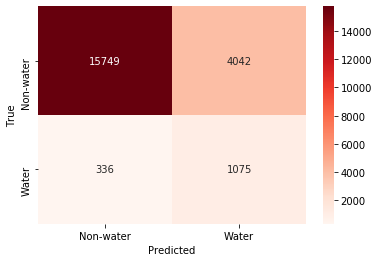

In [14]:
y_true, y_pred = Validation.all_y_true_pred_index('AWEI', 'SE', ['02-01-20', '07-01-20','12-03-20','29-10-19'])
Validation.binary(y_true, y_pred);

## 3. Logistic Regression

In [4]:
LogReg = joblib.load('Algo/Final/loose_LogReg.pkl')
#validation = pd.read_csv('Data/Validation.csv', index_col = 0)


accuracy: 0.9759494891073839
precision: 0.4838709677419355
recall: 0.07401315789473684
f1 score: 0.12838801711840228


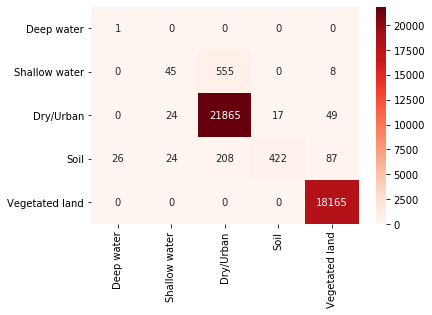

In [17]:
y_true, y_pred = Validation.all_y_true_pred(LogReg, 'NW', ['02-01-20', '07-01-20','26-02-19','29-10-19'])
Validation.evaluate(y_true, y_pred, print_cm=True, print_err=True);


accuracy: 0.9846491228070176
precision: 0.38333333333333336
recall: 0.0755336617405583
f1 score: 0.12620027434842251


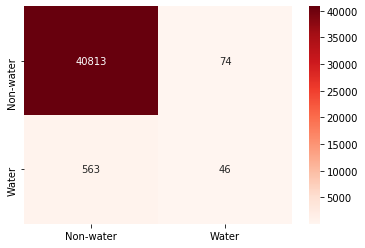

In [18]:
Validation.binary(y_true, y_pred)


accuracy: 0.9580936729663106
precision: 1.0
recall: 0.16987179487179488
f1 score: 0.29041095890410956


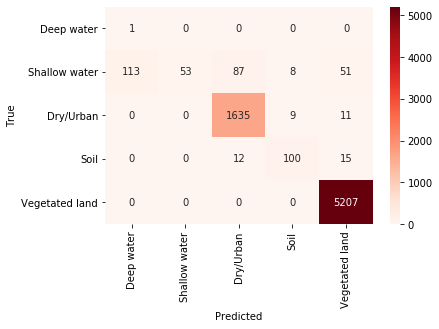

In [10]:
y_true, y_pred = Validation.all_y_true_pred(LogReg, 'SE', ['02-01-20', '07-01-20', '12-03-20','29-10-19'])
Validation.evaluate(y_true, y_pred, print_cm=True, print_err=True);


accuracy: 0.9800054779512463
precision: 1.0
recall: 0.5335463258785943
f1 score: 0.6958333333333334


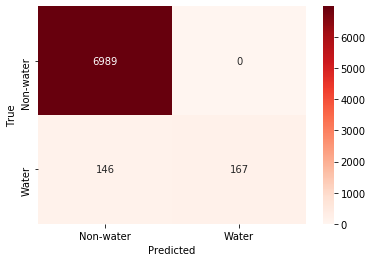

In [11]:
Validation.binary(y_true, y_pred)

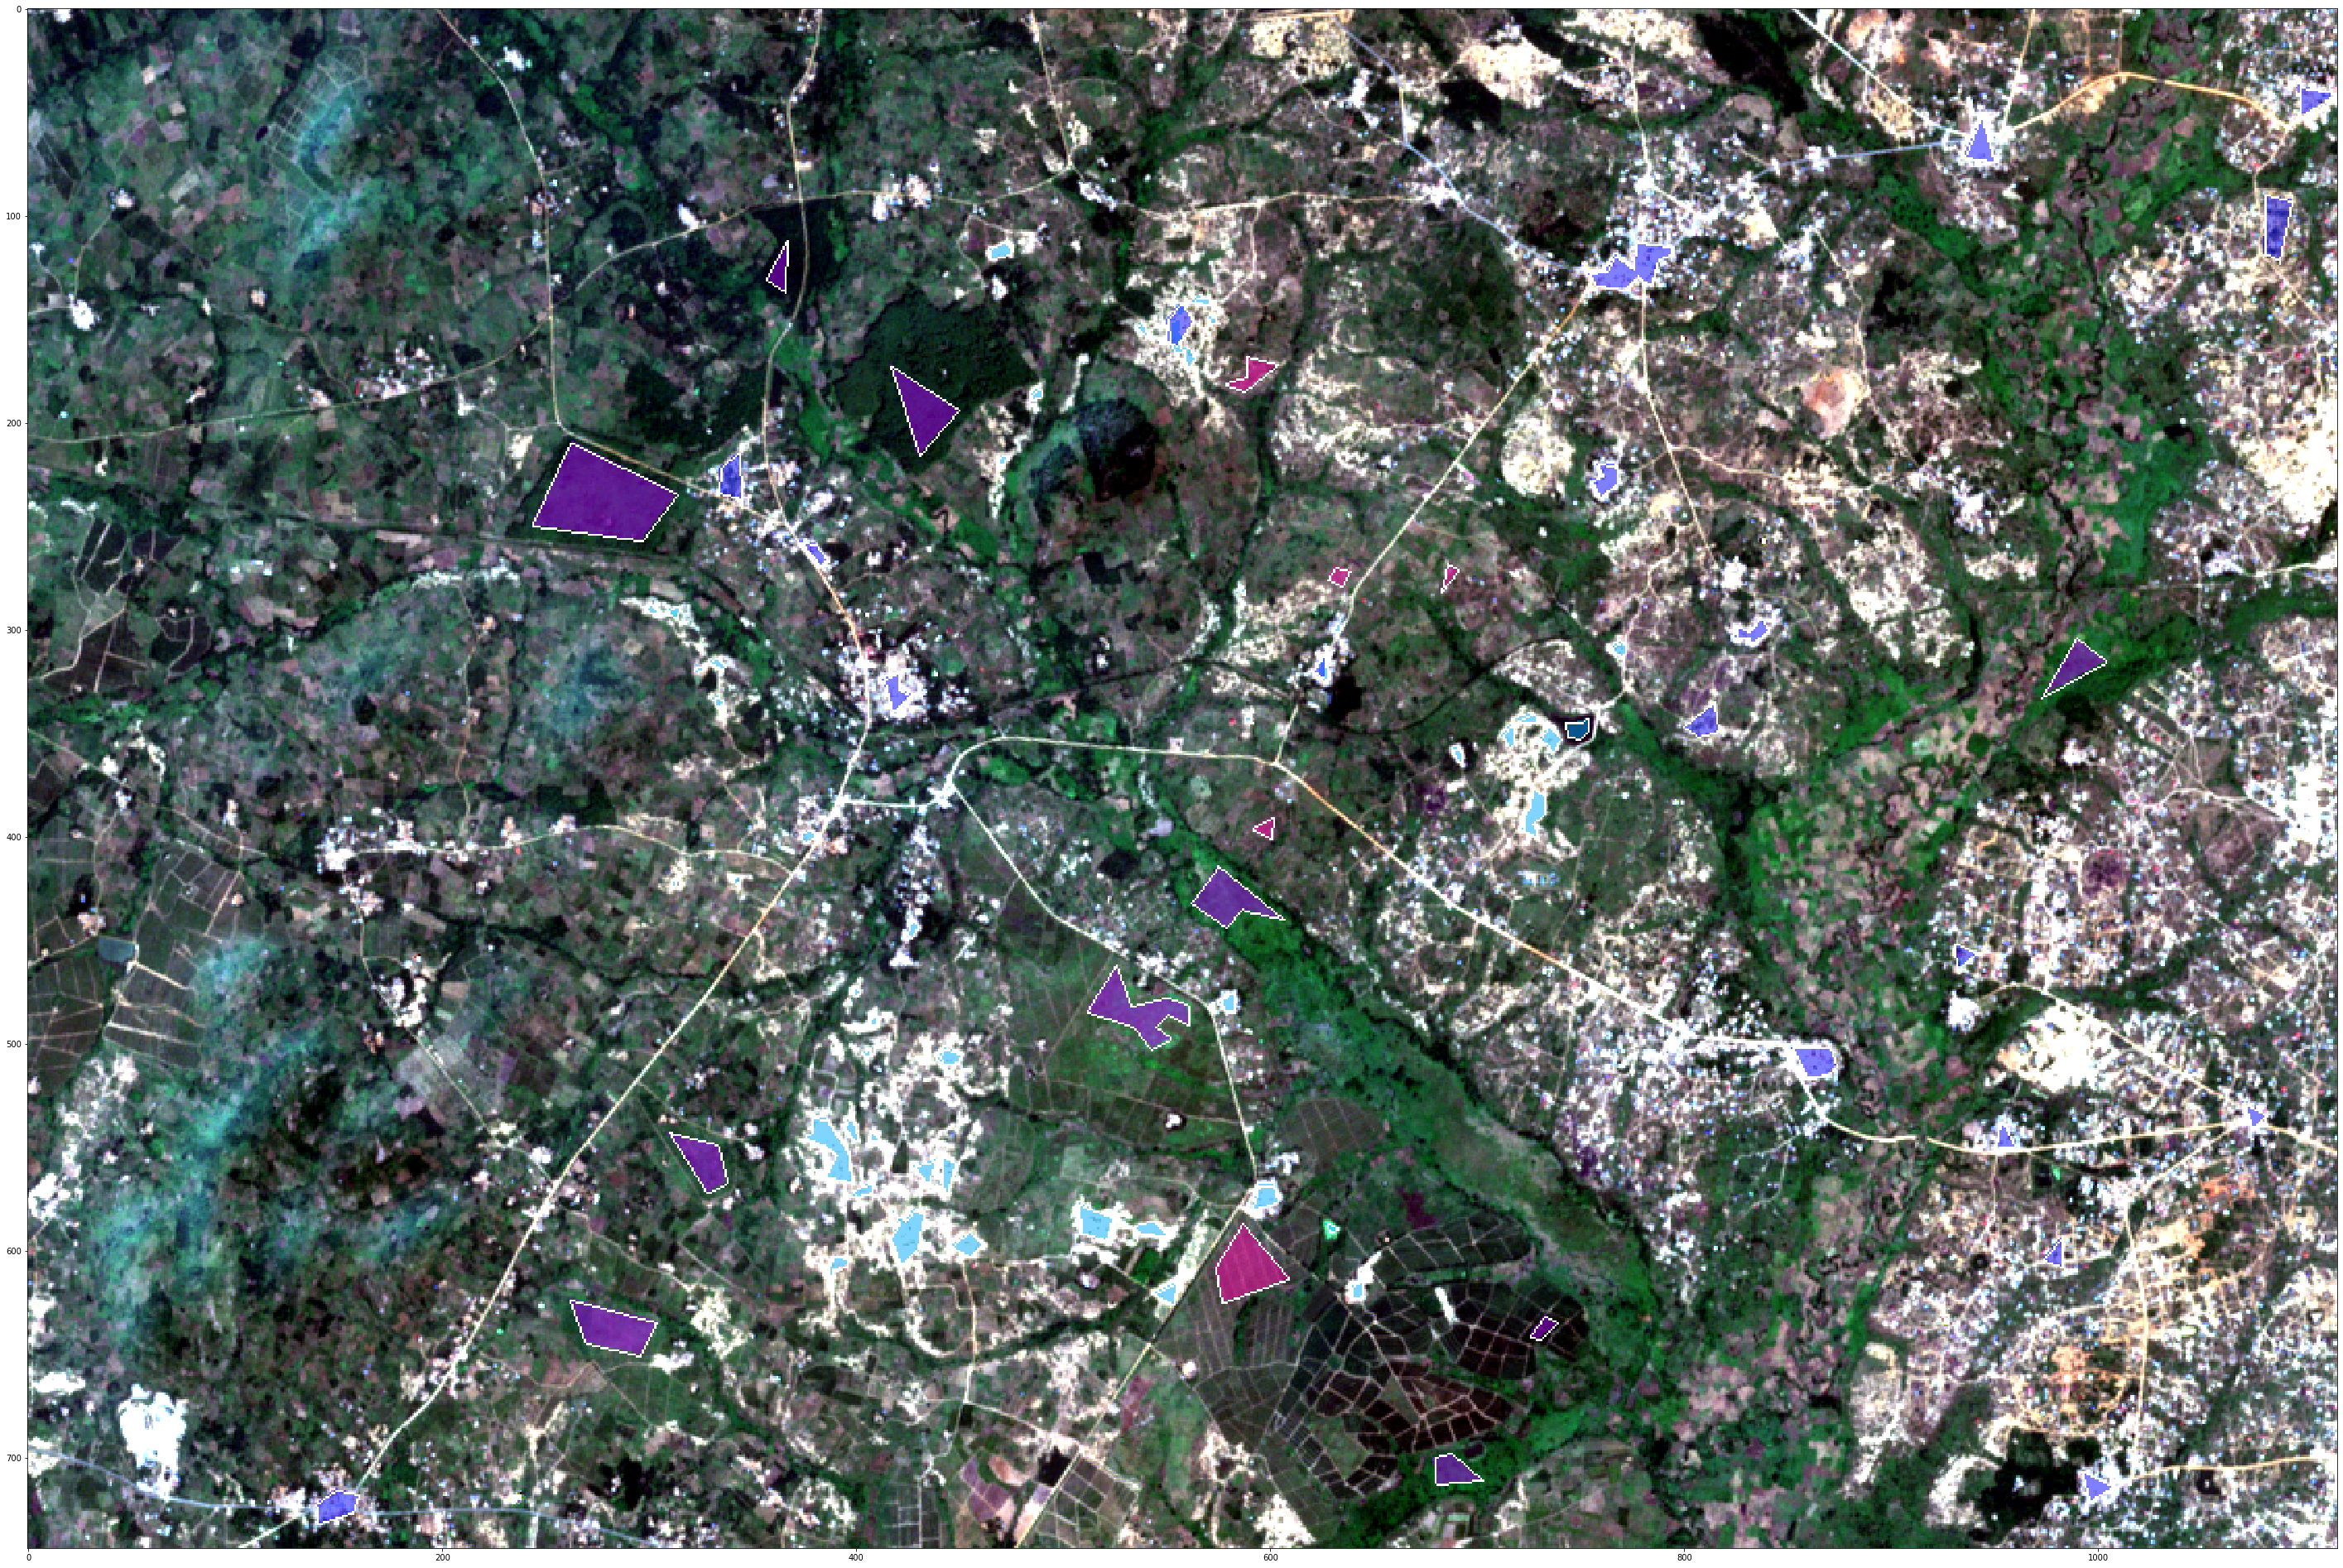

In [6]:
path = 'H:/sentinel2/Ghana/Validation/02-01-20/SE/Images/obom_vectors_RGB.tif'
Image.show_img(path)

### Total


accuracy: 0.9759253903990746
precision: 0.4782608695652174
recall: 0.07236842105263158
f1 score: 0.12571428571428572


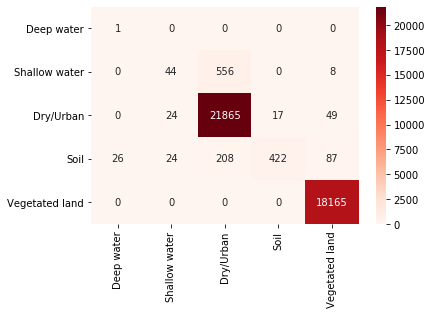

In [10]:
y_true, y_pred = Validation.all_y_true_pred(LogReg, 'NW', ['29-10-19', '26-02-19', '02-01-20', '07-01-20'])
Validation.evaluate(y_true, y_pred, print_cm=True, print_err=True);

# Noise filtering

In [12]:
path = "H:/sentinel2/Ghana/Validation/29-10-19/NW/Agona.tif"
root = 'H:/sentinel2/Ghana/Validation/29-10-19/NW/Shapefiles/'

X = Image.make_dataset(path)['df']
dim = Image.make_dataset(path)['dim']
y_pred = LogReg.predict(X)

y_true = Processing.make_dataset(root, path).Content

pred = ndimage.median_filter(y_pred.reshape(dim), size=5)
Image.save_as_tiff('temp.tif', path, pred)
y_pred, y_true = Validation.get_ypred(root, 'temp.tif', y_true)

error = np.mean(Validation.evaluate(y_true, y_pred))

C:\Users\remot\.conda\envs\Blanca\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



accuracy: 0.17269906928645296
precision: 0.04307406259683917
recall: 0.7679558011049724
f1 score: 0.08157276995305164


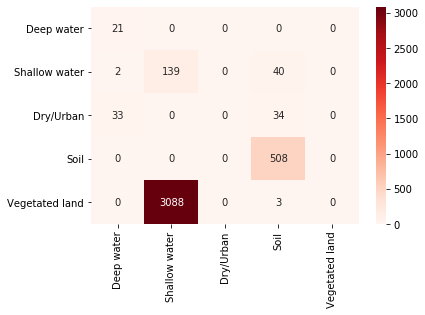

In [13]:
Validation.evaluate(y_true,y_pred,print_cm = True, print_err=True);

In [ ]:
Validation.binary(y_true, y_pred)

## 4. Decision Trees

In [7]:
DecTrees = joblib.load('Algo/Final/DT.pkl')


accuracy: 0.8541175360815018
precision: 0.5570400822199383
recall: 0.3843971631205674
f1 score: 0.45488879563575324


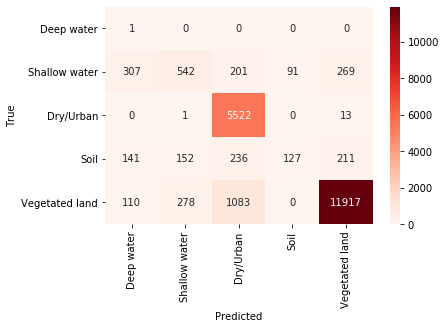

In [8]:
y_true, y_pred = Validation.all_y_true_pred(DecTrees, 'SE', ['02-01-20', '07-01-20', '12-03-20', '29-10-19'])
Validation.evaluate(y_true, y_pred, print_cm=True, print_err=True);


accuracy: 0.9413734553344024
precision: 0.5548302872062664
recall: 0.6024096385542169
f1 score: 0.5776418620455318


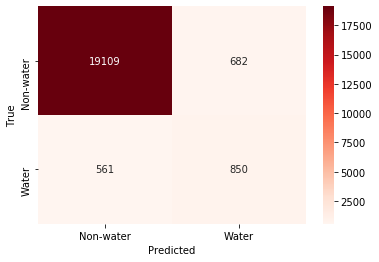

In [9]:
Validation.binary(y_true, y_pred)

In [ ]:
y = loadtxt('t.csv', delimiter=',')

def y_true_pred(model, root, rasterpath): 
    
    df = make_dataset(root, rasterpath) 

    y_true = df.Content
    y_true = [3 if x==6 else x for x in y_true]
    X = df[x_cols]
    y_pred = model.predict(X)
#    
#    for i in range(1,6):
#        if i not in y_pred:
#            y_pred = np.append(y_pred,i)
#            
#    for i in range(1,6):
#        if i not in y_true:
#            y_true = np.append(y_true,i)
            
    return y_true, y_pred